# 9. Thresholding

A very standard operation in image processing is to try to identify objects in an image using their intensity. For that one sets a threshold above which pixels are considered significant and one can analyze that output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io

## 9.1 Importing the image

Let's import the image, plot it and check its dimensions:

In [ ]:
#image_stack = skimage.io.imread('../Data/myoblast.tif')
image_stack = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13585/13585.tif')

In [ ]:
image_stack.shape

(1040, 1392, 3)

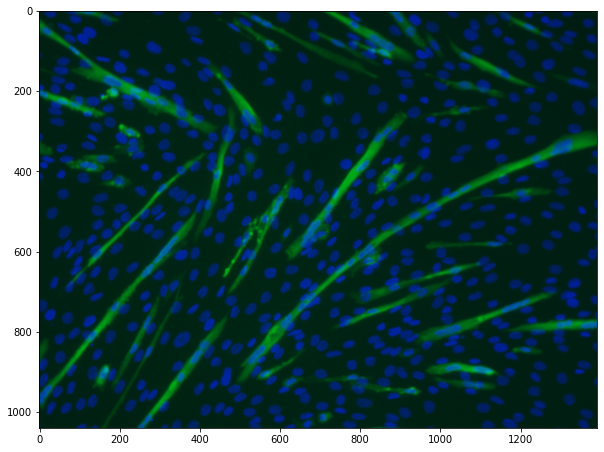

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(image_stack);

We have again a three channel image, i.e. our image is composed of three planes. For the moment we only want to work with the nuclei, so we isolate that channel, the third one: 

In [ ]:
image_nuclei = image_stack[:,:,2]

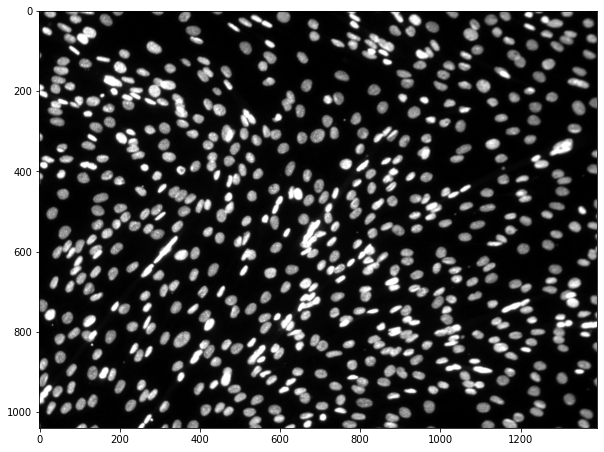

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(image_nuclei, cmap = 'gray');

## 9.2 Manual investigation

If we want to isolate nuclei, we have to know more or less what intensity they have so that we can use a cutoff value on pixel intensities. We can look at the histogram of pixel values:

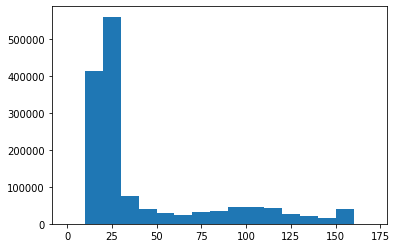

In [ ]:
plt.hist(np.ravel(image_nuclei), bins = np.arange(0,180,10));

Clearly we have background intensity between 0 and 60, and the signal spread out between 60 and 160. We can create a mask of all the pixels with a value above 60: 

In [ ]:
mask = image_nuclei > 60

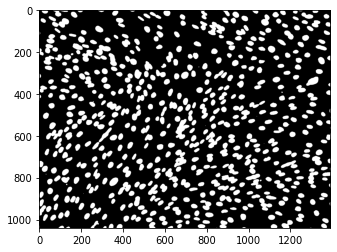

In [ ]:
plt.imshow(mask, cmap = 'gray');

Let's increase that threshold:

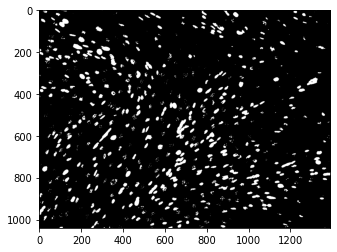

In [ ]:
mask = image_nuclei > 120
plt.imshow(mask, cmap = 'gray');

## 9.3 Automatic thresholding

Setting a threshold manually is not ideal for two reasons: 1. your eyes might fool you, and 2. if you have to do this operation on 100s of images you don't want to do it by hand.

Several methods have been developed to detect an "ideal" threshold based on the pixel histogram. One of the most famous ones is the Otsu method: it sets a threshold by dividing the pixels in two classes and tries to minimize the variance of both classes.

Such classical algorithms are all implemented in Scikit-Image and we can just use them out of the box. All algorithm are grouped in logical groups (filtering, measuring etc.) Often the easiest is just to use Google to find them.

For example the [Otsu algorithm](https://www.google.com/search?q=skimage+otsu&oq=skimage+otsu&aqs=chrome..69i57j69i60j0l4.2268j0j7&sourceid=chrome&ie=UTF-8):

In [ ]:
import skimage.filters

help(skimage.filters.threshold_otsu)

Help on function threshold_otsu in module skimage.filters.thresholding:

threshold_otsu(image, nbins=256)
    Return threshold value based on Otsu's method.
    
    Parameters
    ----------
    image : (N, M) ndarray
        Grayscale input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    
    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.
    
    Raises
    ------
    ValueError
         If ``image`` only contains a single grayscale value.
    
    References
    ----------
    .. [1] Wikipedia, https://en.wikipedia.org/wiki/Otsu's_Method
    
    Examples
    --------
    >>> from skimage.data import camera
    >>> image = camera()
    >>> thresh = threshold_otsu(image)
    >>> binary = image <= thresh
    
    Notes
    -----
    The input image must be grayscale.



In [ ]:
my_otsu_threshold = skimage.filters.threshold_otsu(image_nuclei)
print(my_otsu_threshold)

67


Using that value we can create a new mask:

In [ ]:
mask_nuclei = image_nuclei > my_otsu_threshold

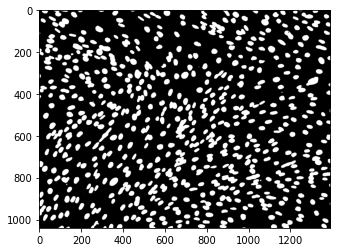

In [ ]:
plt.imshow(mask_nuclei, cmap = 'gray');

## 9.4 Combining masks

We can do the same thresholding operation on the other channel contained in the image. Let's first "isoloate" the second channel (green):

In [ ]:
image_cells = image_stack[:,:,1]

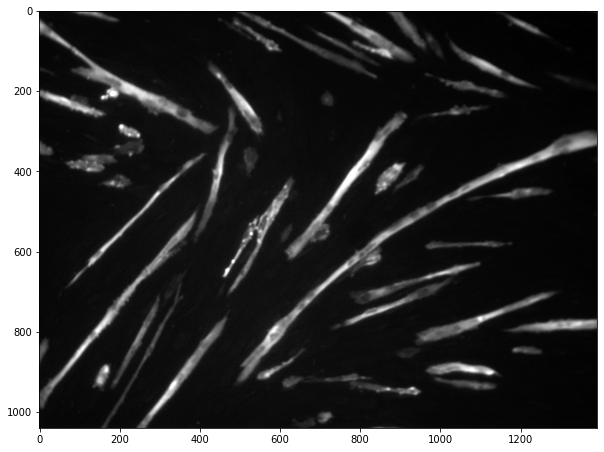

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(image_cells, cmap = 'gray');

In [ ]:
mask_cells = image_cells > skimage.filters.threshold_otsu(image_cells)

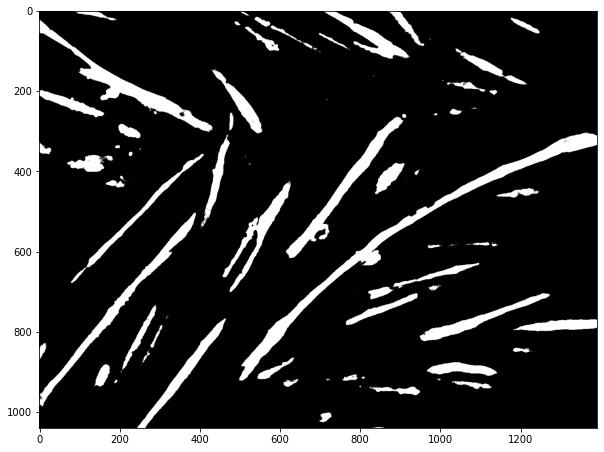

In [22]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells, cmap = 'gray');

We can now combine these masks in different ways. For example if we only want to study the nuclei present in the green cells, we can combine masks to recover only those. For this **both** masks should be ON, which is reproduced if we multiply the images (think of True as 1s and False as 0s).

In [23]:
nuclei_in_cells = mask_cells * mask_nuclei

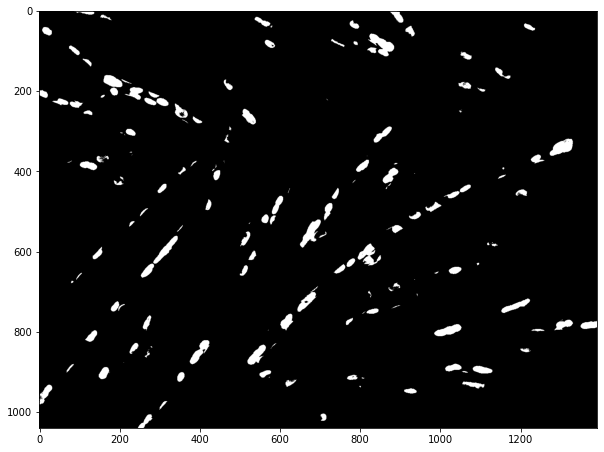

In [24]:
plt.subplots(figsize=(10,10))
plt.imshow(nuclei_in_cells, cmap = 'gray');

Now that we have **segmented** elements in our image, we want to be able to quantify those elements, which is what is done in chapter 11. In part 10 we can see how we can improve the masks by cleaning them up using binary/morphological operations.